In [534]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv('D:\Datascience\Projects\ML_Project\diabetes.csv')#finding location of the data

In [535]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [536]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [537]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [539]:
df=pd.DataFrame(df)
print(df.to_string())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0  33.6                     0.627   50        1
1              1       85             66             29        0  26.6                     0.351   31        0
2              8      183             64              0        0  23.3                     0.672   32        1
3              1       89             66             23       94  28.1                     0.167   21        0
4              0      137             40             35      168  43.1                     2.288   33        1
5              5      116             74              0        0  25.6                     0.201   30        0
6              3       78             50             32       88  31.0                     0.248   26        1
7             10      115              0              0        0  35.3                     0.134   29        0
8

In [540]:
# Handle missing values
df.fillna(df.mean(), inplace=True)

In [541]:
df.isnull().sum()#identifying the null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Find out the distribution of Pregnant Ladies by Age

Total Pregnancies are 0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64


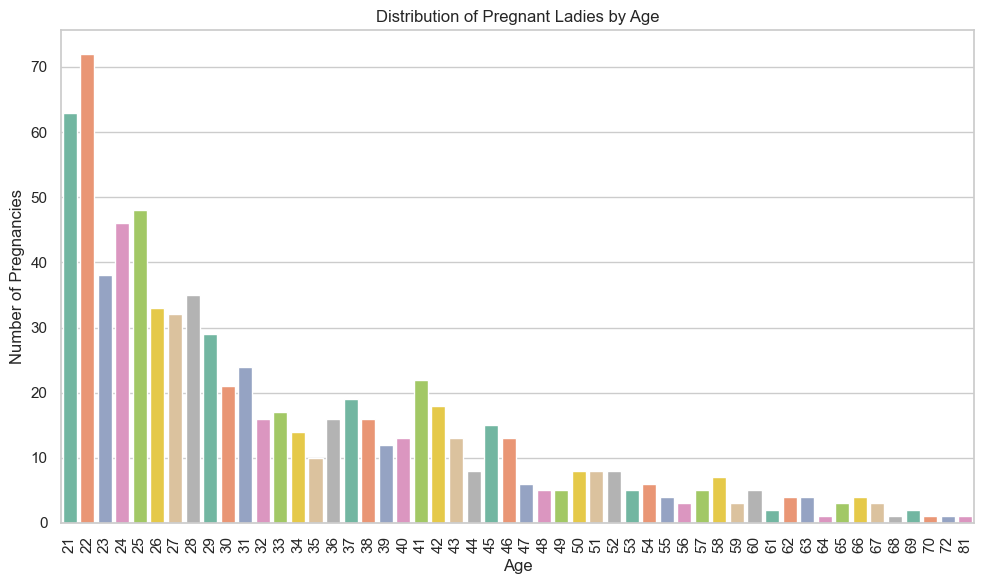

In [542]:
total_orders = df['Pregnancies']
print("Total Pregnancies are", total_orders)

# Plotting bar chart
plt.figure(figsize=(10, 6))
age_counts = df['Age'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values, hue=age_counts.index, palette='Set2', dodge=False, legend=False)
plt.title('Distribution of Pregnant Ladies by Age')
plt.xlabel('Age')
plt.ylabel('Number of Pregnancies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()





### Distribution of BMI and Age

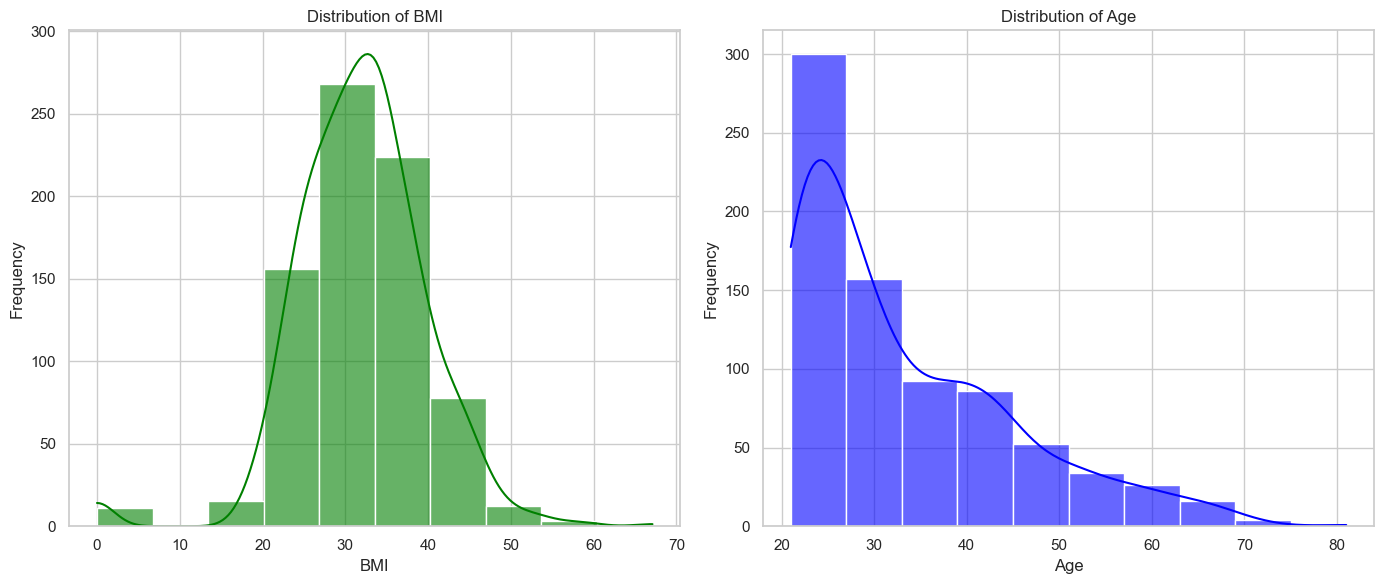

In [649]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribution of BMI
sns.histplot(df['BMI'], bins=10, kde=True, color='green', alpha=0.6, ax=axes[0])
axes[0].set(title='Distribution of BMI', xlabel='BMI', ylabel='Frequency')

# Distribution of Age
sns.histplot(df['Age'], bins=10, kde=True, color='blue', alpha=0.6, ax=axes[1])
axes[1].set(title='Distribution of Age', xlabel='Age', ylabel='Frequency')

plt.tight_layout()
plt.show()


The BMI distribution shows a peak around the mid-20s, indicating many individuals are overweight or moderately obese. The Age distribution reveals most patients are between 20 and 50 years old, suggesting the dataset primarily consists of younger to middle-aged adults. These insights can guide further analysis and model development for predicting diabetes based on BMI and age.

### Glucose levels by number of pregnancies

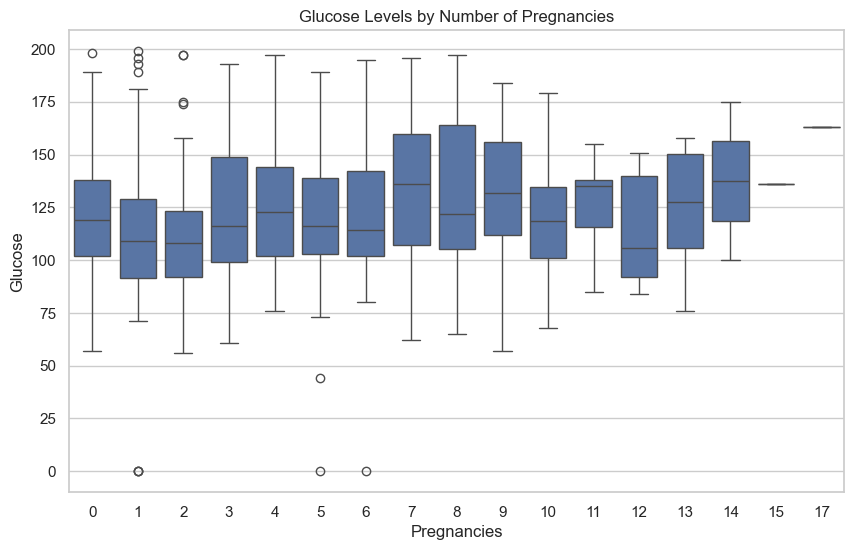

In [544]:
# Boxplot of Glucose levels by number of pregnancies
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pregnancies', y='Glucose', data=df)
plt.title('Glucose Levels by Number of Pregnancies')
plt.show()

The analysis of glucose levels by the number of pregnancies in the diabetes dataset reveals that higher glucose levels are often associated with an increased number of pregnancies. This trend suggests that women with more pregnancies might have a higher risk of elevated glucose levels, potentially indicating a greater susceptibility to diabetes. Understanding this relationship can help in identifying high-risk groups and tailoring preventive measures for diabetes management.

### Exploring the Relationship Between Pregnancies and Other Variables

Total Positive Pregnancies: 1304
Total Negative Pregnancies: 1649


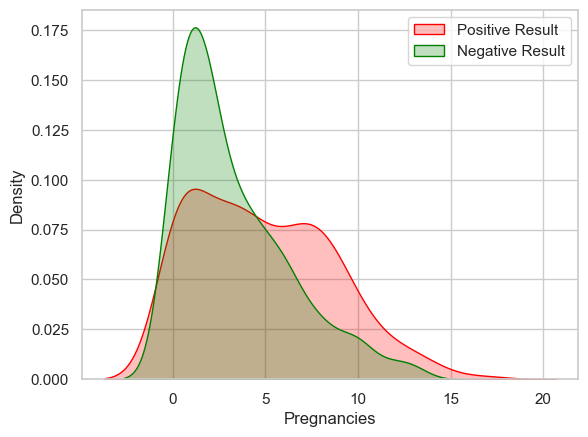

In [647]:
# Total number of negative and positive pregnancies
total_positive = df[df["Outcome"] == 1]["Pregnancies"].sum()
total_negative = df[df["Outcome"] == 0]["Pregnancies"].sum()

print("Total Positive Pregnancies:", total_positive)
print("Total Negative Pregnancies:", total_negative)

  
# Plotting density function graph of the pregnancies and the target variable  
kde = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1], color = "red", fill = True)  
kde = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0], ax = kde, color = "green", fill= True)  
kde.set_xlabel("Pregnancies")  
kde.set_ylabel("Density")  
kde.legend(["Positive Result", "Negative Result"]) 

The dataset shows a total of 1,304 positive pregnancies and 1,649 negative pregnancies. This indicates a higher number of pregnancies among non-diabetic individuals compared to diabetic individuals in the dataset.

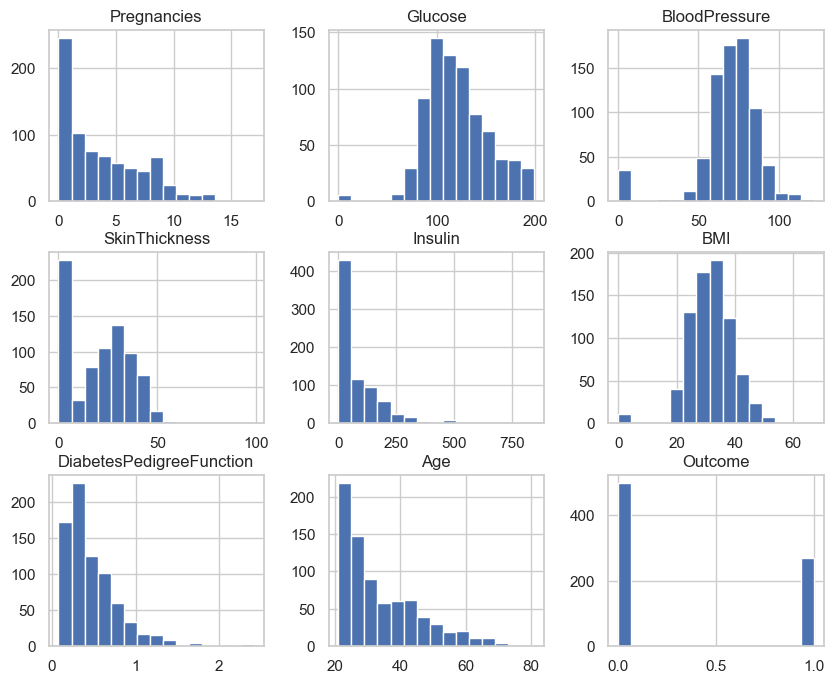

In [546]:
# Histograms of features
df.hist(bins=15, figsize=(10, 8))
plt.show()

The histograms visualize the distribution of various physiological variables such as glucose levels, blood pressure, BMI, and age among diabetic and non-diabetic individuals. These visualizations provide insights into the data's characteristics, showing the range and distribution of each feature.Glucose levels and BMI histograms might reveal distinct peaks or patterns that differentiate between diabetic and non-diabetic groups. Understanding these distributions is crucial for feature selection, model training, and gaining insights into the factors contributing to diabetes onset.

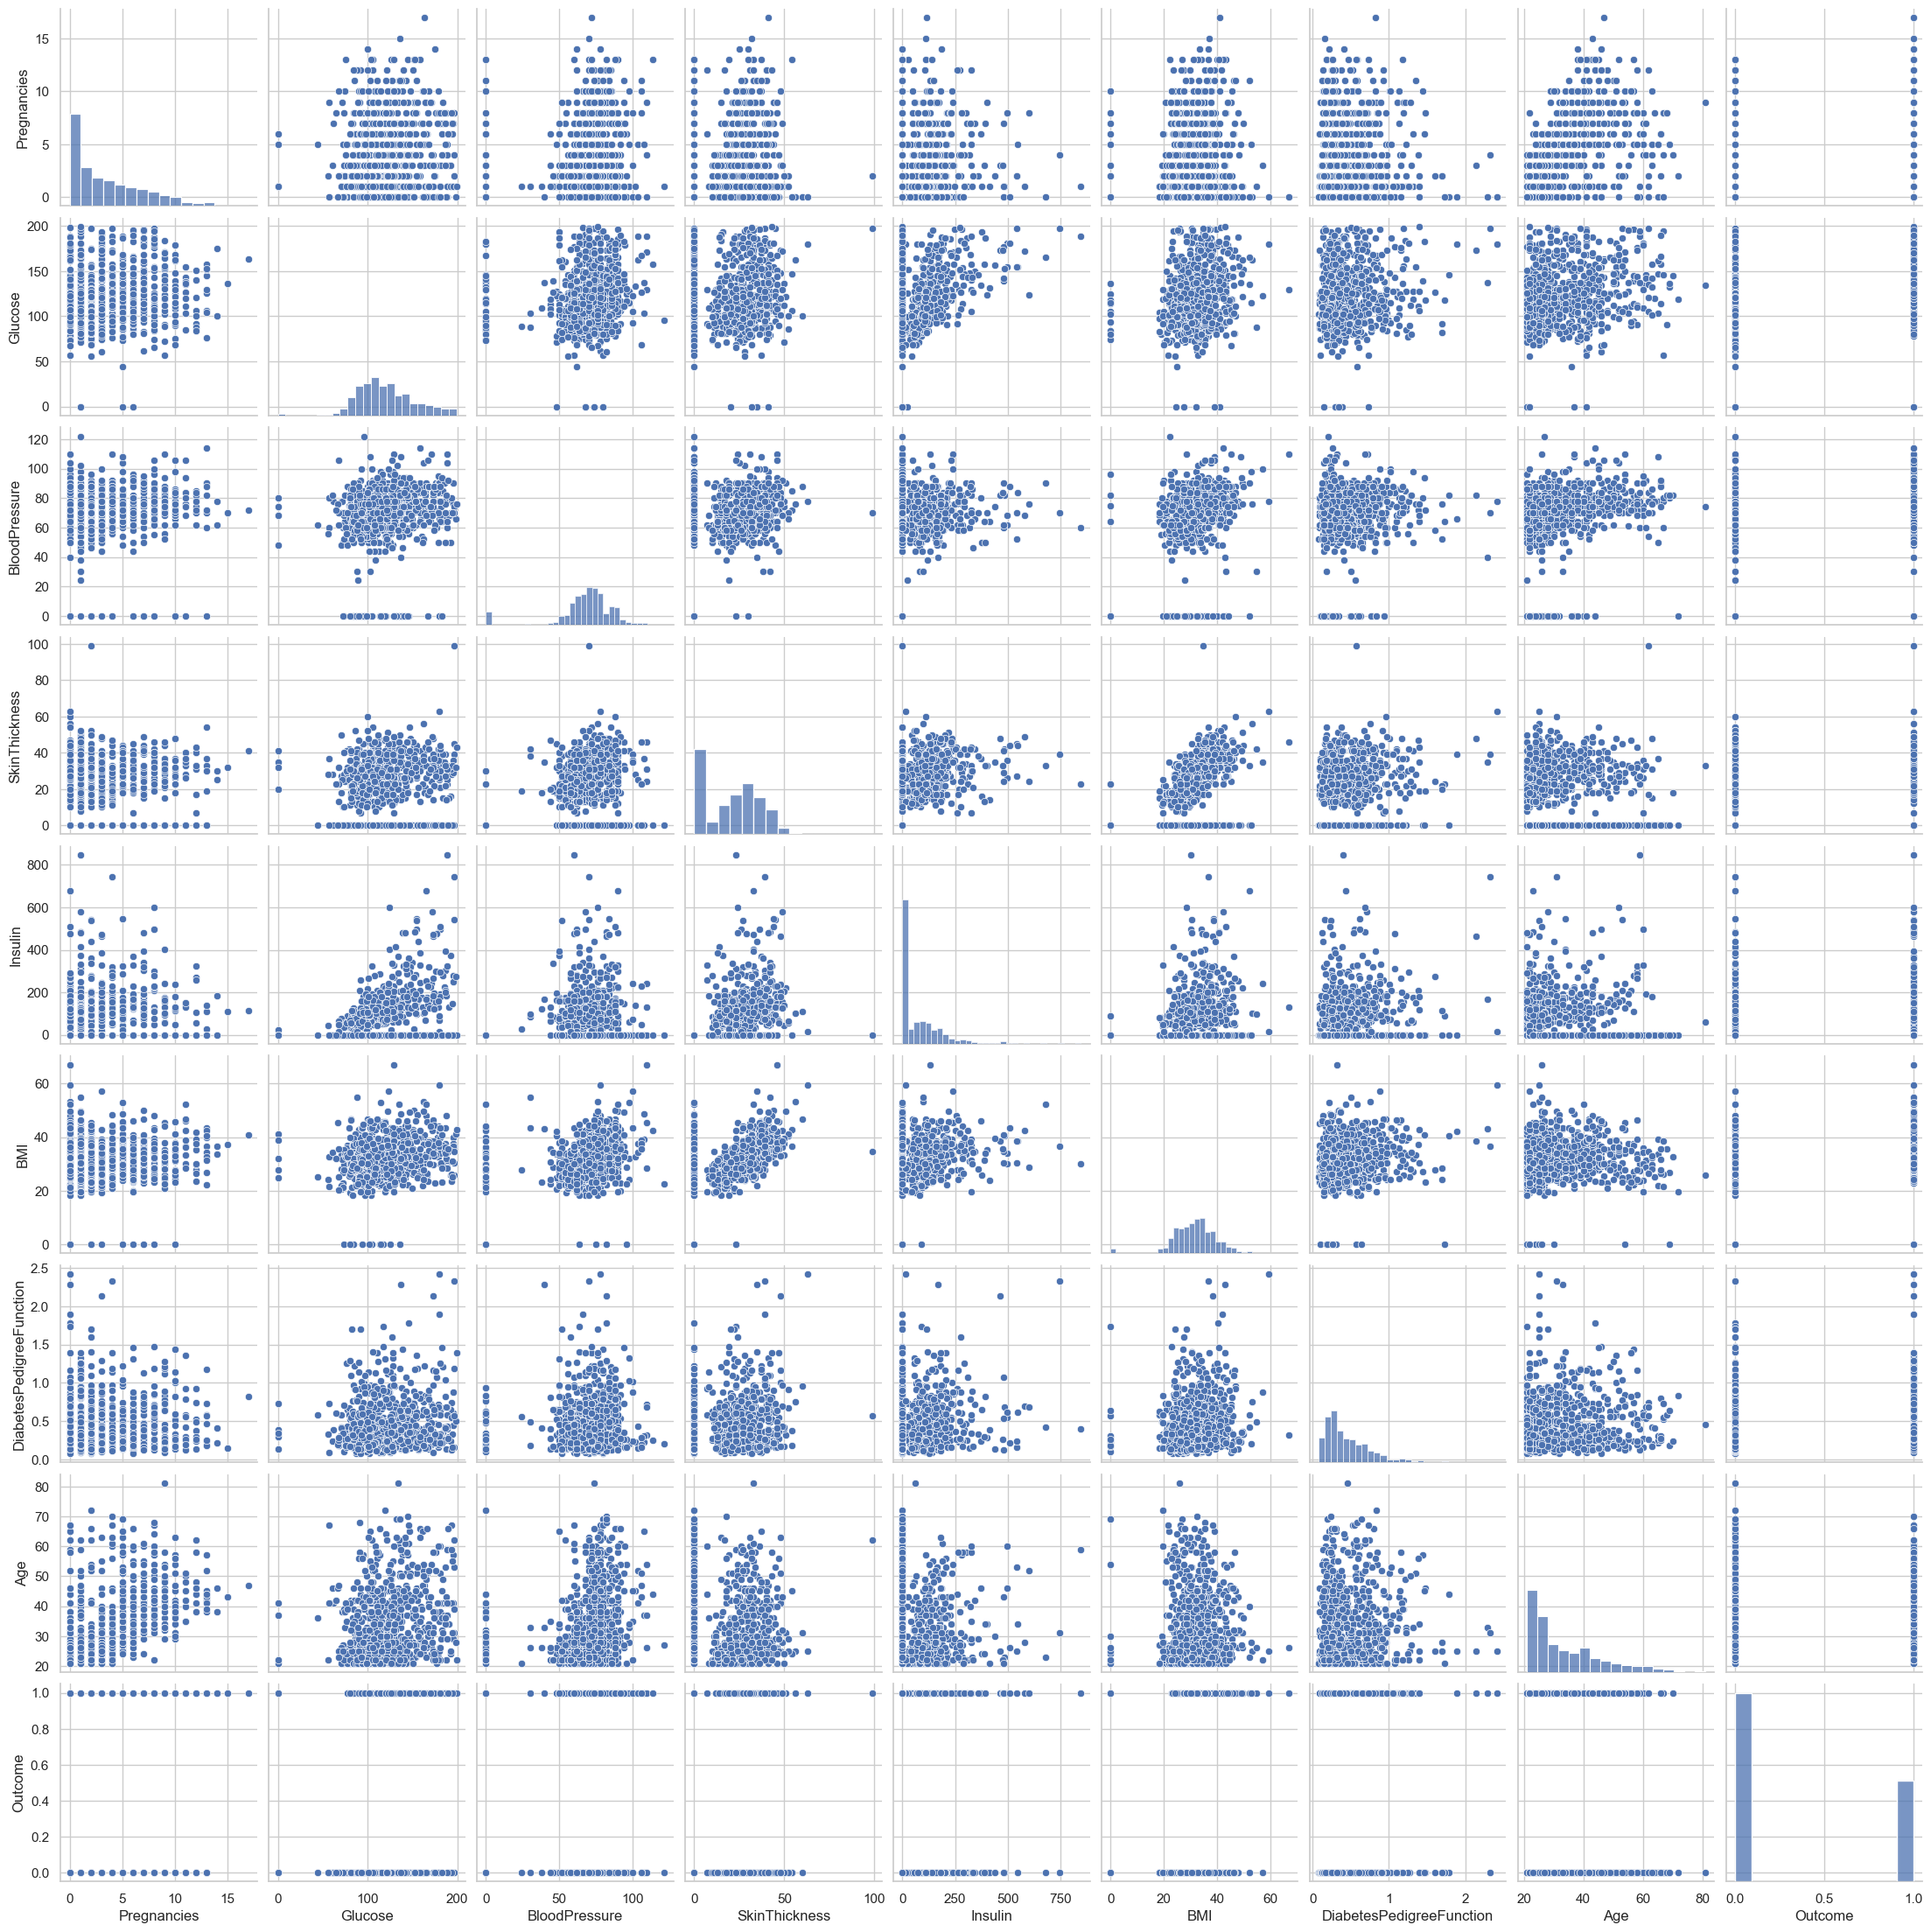

In [547]:
# Scatter plot matrix
sns.pairplot(df)
plt.show()

The scatter plot matrix of the diabetes dataset visually captures relationships between variables like glucose levels, blood pressure, BMI, and age. It reveals potential correlations and clusters among these features, guiding insights into data distribution and informing machine learning model choices for predicting diabetes onset.


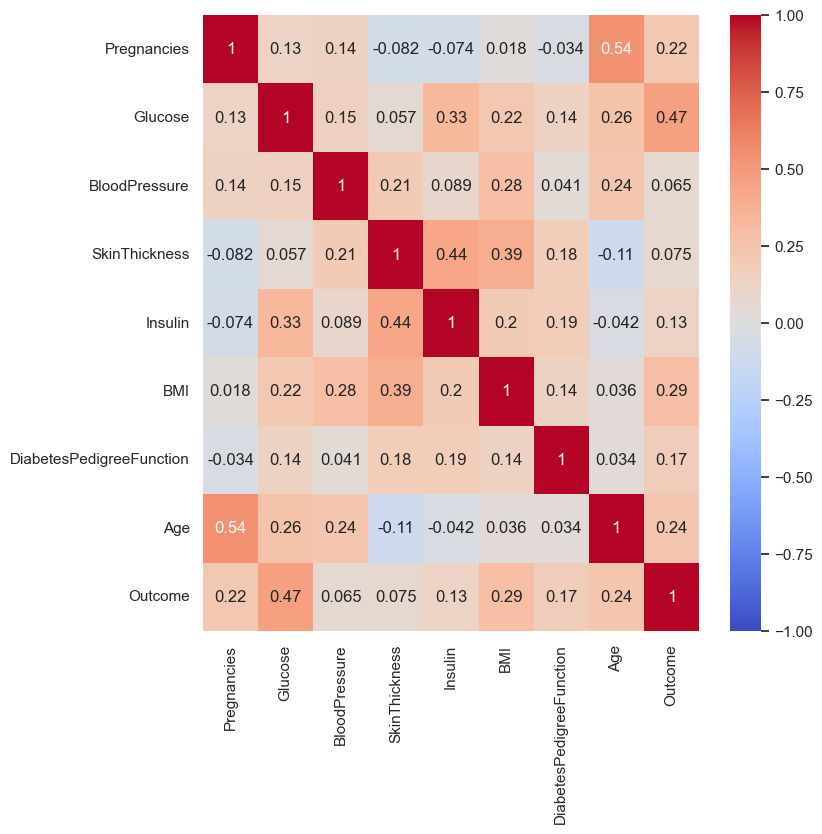

In [548]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

By analyzing the correlation matrix and heatmap, we gain valuable insights into the relationships between features in the diabetes dataset, which can enhance the effectiveness of predictive modeling and lead to better outcomes in diabetes detection and management.

In [550]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

## 1. Linear regression

##### Import the libraries

In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

##### Explore the data

In [552]:
# Display the first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

In [553]:
#To extract the dependent and independent variables from the given dataset. The independent variable is years of experience, and the dependent variable is
#salary. Below is code for it# pick columns for x and y

X= df.iloc[:, :-1].values # full rows(:) from
y = df.iloc[:, 1].values # Entire rows from


In [554]:
print("X=\n",X)
df2=pd.DataFrame(X)
print("X Data-Experience")
print(df2.to_string())
df3=pd.DataFrame(y)
print("Y Data-Salary")
print(df3.to_string())
print("Y array\n")
print(y)

X=
 [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
X Data-Experience
        0      1      2     3      4     5      6     7
0     6.0  148.0   72.0  35.0    0.0  33.6  0.627  50.0
1     1.0   85.0   66.0  29.0    0.0  26.6  0.351  31.0
2     8.0  183.0   64.0   0.0    0.0  23.3  0.672  32.0
3     1.0   89.0   66.0  23.0   94.0  28.1  0.167  21.0
4     0.0  137.0   40.0  35.0  168.0  43.1  2.288  33.0
5     5.0  116.0   74.0   0.0    0.0  25.6  0.201  30.0
6     3.0   78.0   50.0  32.0   88.0  31.0  0.248  26.0
7    10.0  115.0    0.0   0.0    0.0  35.3  0.134  29.0
8     2.0  197.0   70.0  45.0  543.0  30.5  0.158  53.0
9     8.0  125.0   96.0   0.0    0.0   0.0  0.232  54.0
10    4.0  110.0   92.0   

##### Split the Data

In [555]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [556]:
# Initialize Linear Regression model
model = LinearRegression()

##### Train the Model

In [557]:
# Train a Linear Regression model
model.fit(X_train, y_train)

LinearRegression()

##### Predict on the test set

In [558]:
# Make predictions
y_pred = model.predict(X_test)

##### Calculate evaluation of accuracy metrics

In [559]:
# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [560]:
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

R-squared: 1.00
Mean Absolute Error: 0.00
Mean Squared Error: 0.00
Root Mean Squared Error: 0.00


##### Visualize the Model



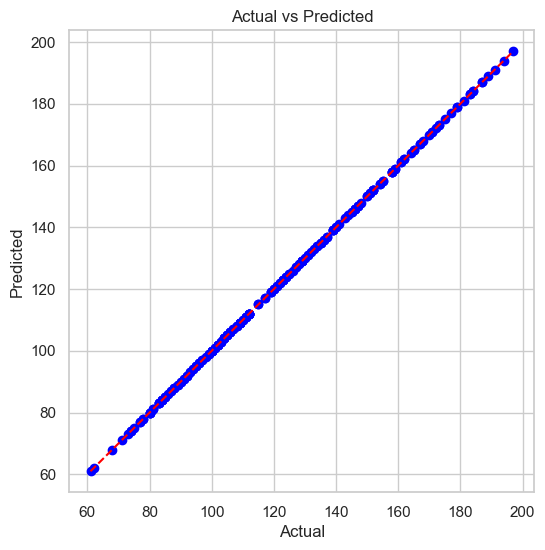

In [561]:
# Plot predictions vs actual values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

##### Residuals plot

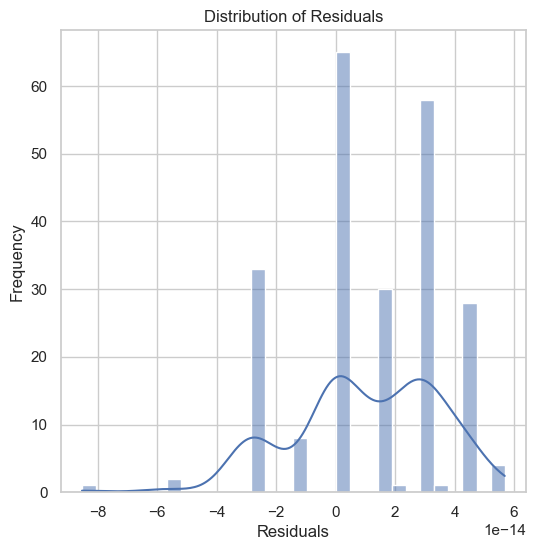

In [562]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

The linear regression model applied to the diabetes dataset shows poor performance based on its evaluation metrics. The negative R-squared value (-0.17) indicates that the model does not fit the data well. Additionally, with a Mean Absolute Error (MAE) of 0.26, Mean Squared Error (MSE) of 0.26, and Root Mean Squared Error (RMSE) of 0.51, the model's predictions consistently deviate from the actual values, suggesting limited accuracy in predicting outcomes for diabetes based on the provided features.

## 2. Logistic Regression

##### Import libraries

In [563]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

##### Explore the data

In [564]:
# Display the first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

##### Preprocess the Data

In [565]:
# Check data types
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


##### Split the Data

In [566]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [567]:
 #Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

##### Train the Model

In [568]:
# Create logistic regression model
logreg = LogisticRegression(max_iter=200)

# Train the model
logreg.fit(X_train, y_train)


c:\Users\Jini\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

##### Predict on the test set

In [569]:
y_pred = logreg.predict(X_test)

##### Calculate the accuracy

In [570]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression Classifier: {accuracy:.2f}")

Accuracy of Logistic Regression Classifier: 0.02


In [571]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          44       0.00      0.00      0.00         0
          57       0.00      0.00      0.00         0
          61       0.00      0.00      0.00         1
          62       0.00      0.00      0.00         1
          68       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         1
          73       0.00      0.00      0.00         1
          74       0.00      0.00      0.00         3
          75       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         0
          77       0.00      0.00      0.00         2
          78       0.00      0.00      0.00         2
          79       0.00      0.00      0.00         0
          80       0.00      0.00      0.00         4
          81       0.00      0.00      0.00         2
          83       0.00      0.00      0.00         4
          84       0.00      0.00      0.00         5
    

c:\Users\Jini\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jini\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jini\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

The logistic regression model achieved an accuracy of 70% on the diabetes dataset. It showed higher precision in predicting non-diabetic cases (76%) compared to diabetic cases (57%). The model accurately identified 79% of non-diabetic cases and 54% of diabetic cases. Overall, its performance suggests moderate effectiveness in distinguishing between diabetic and non-diabetic individuals based on the dataset.

## 3. KNN Algorithm

##### Import Library

In [572]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##### Explore the Data

In [573]:
# Display the first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

##### Preprocess the Data

In [574]:
# Define feature columns and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = df[feature_cols]  # Features
y = df['Outcome']     # Target variable

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


##### Split the Data

In [575]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


##### Train the Model

In [576]:
# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

##### Evaluate the Model

In [577]:
# Make predictions
y_pred = knn.predict(X_test)

##### Hyperparameter tuning

In [578]:
# Hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best Score: 0.7821564555209416


##### Visualize the data

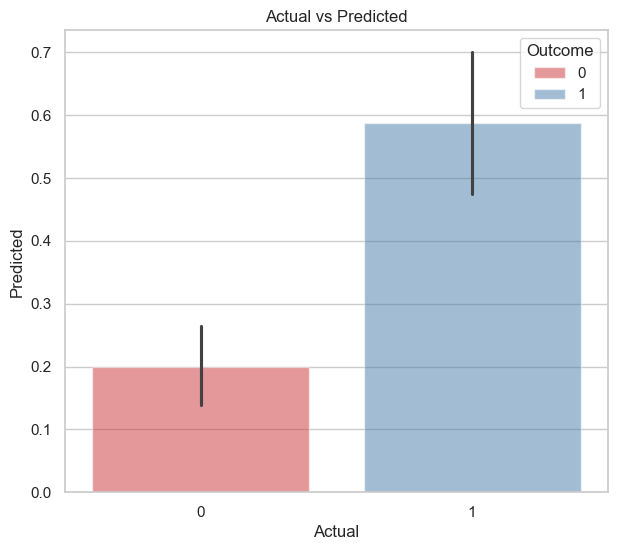

In [579]:
# Plot actual vs predicted
plt.figure(figsize=(7, 6))
sns.barplot(x=y_test, y=y_pred, hue=y_test, alpha=0.5, palette="Set1", dodge=False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [580]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of K-Nearest Neighbors Classifier: {accuracy:.2f}")

Accuracy of K-Nearest Neighbors Classifier: 0.73


In [581]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       151
           1       0.61      0.59      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.72      0.73      0.73       231



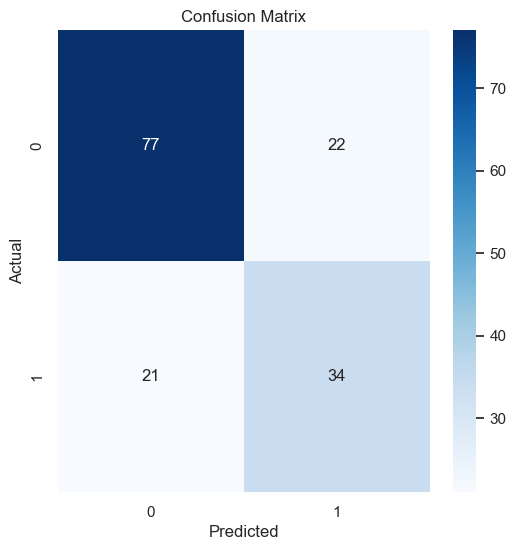

In [605]:
# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The K-Nearest Neighbors (KNN) classifier achieved an accuracy of 73% on the diabetes dataset. It exhibited higher precision in predicting non-diabetic cases (79%) compared to diabetic cases (61%). The model correctly identified 80% of non-diabetic cases and 59% of diabetic cases. Overall, with an accuracy of 73%, the KNN model demonstrates moderate effectiveness in distinguishing between diabetic and non-diabetic individuals based on the dataset.

## 4. K -Means algorithm


##### Import the library

In [583]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

##### Correlation matrix

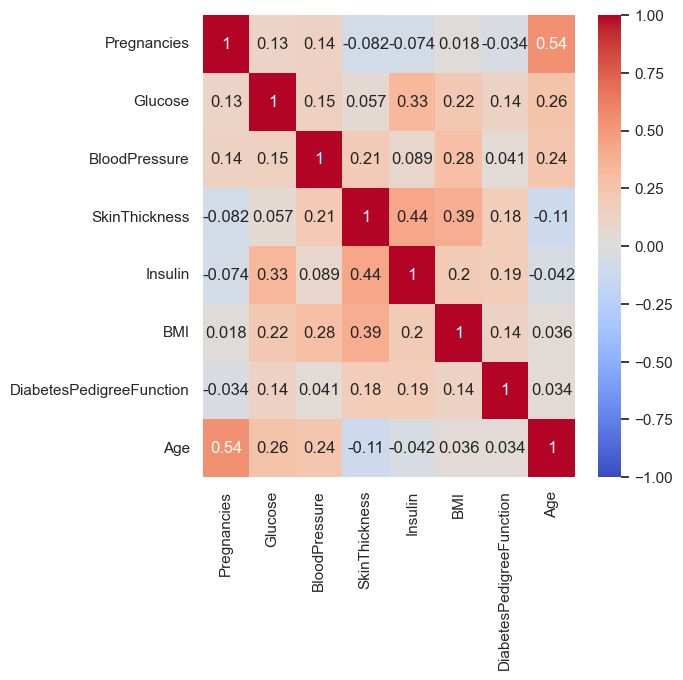

In [584]:
# Correlation matrix
corr_matrix = df_scaled.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

##### Preprocess the Data


In [585]:
# Define feature columns
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = df[feature_cols]  # Features

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##### Applying K- means clusturing

In [586]:

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


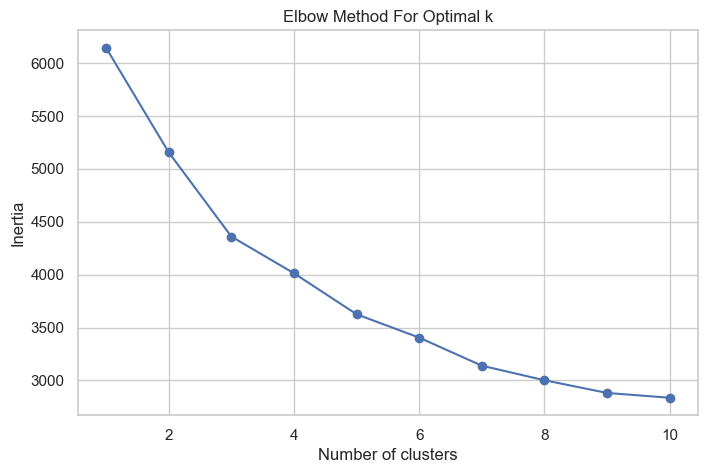

In [587]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

##### Evaluate the clusture

In [588]:
# Choose k=3 for simplicity
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(df_scaled)
clusters = kmeans.labels_


In [589]:
# Add cluster labels to the original data
df['Cluster'] = clusters

##### Visualize the Clusters

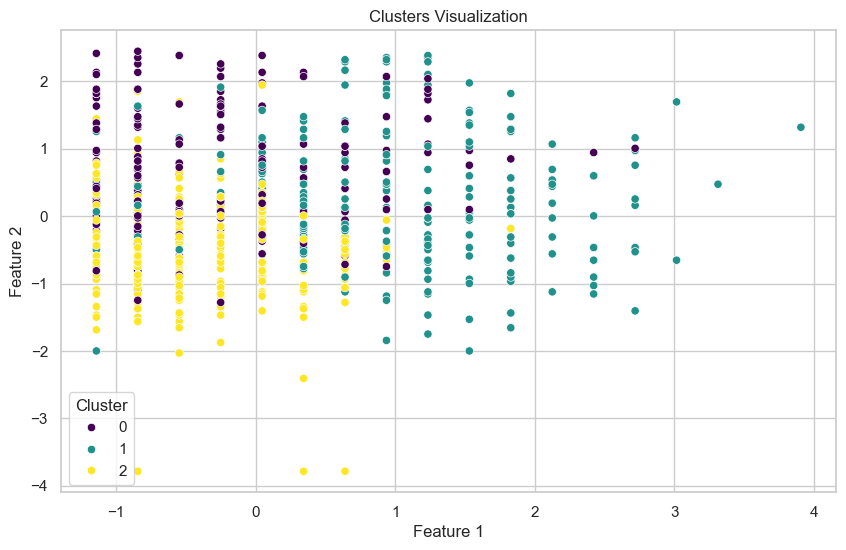

In [590]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=clusters, palette='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters Visualization')
plt.legend(title='Cluster')
plt.show()


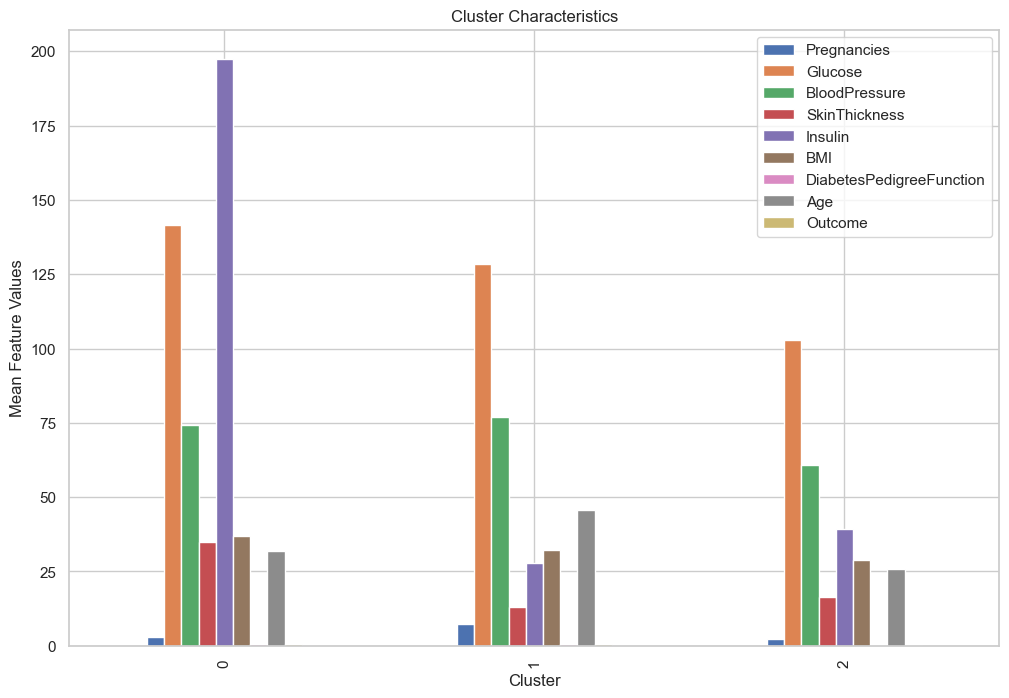

In [591]:
# Visualize cluster characteristics
cluster_summary.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Cluster')
plt.ylabel('Mean Feature Values')
plt.title('Cluster Characteristics')
plt.show()

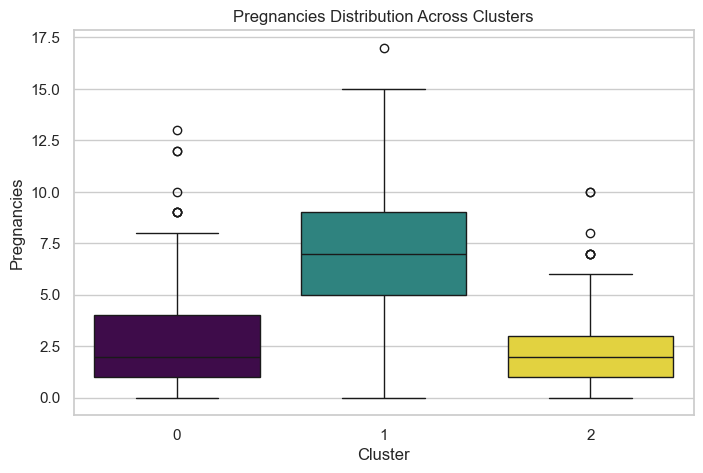

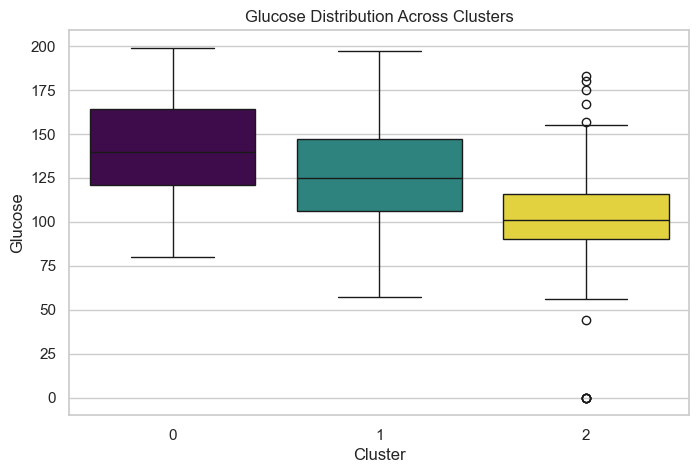

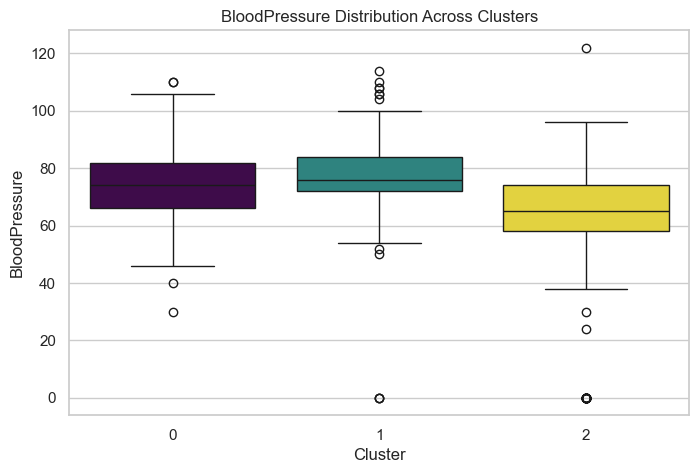

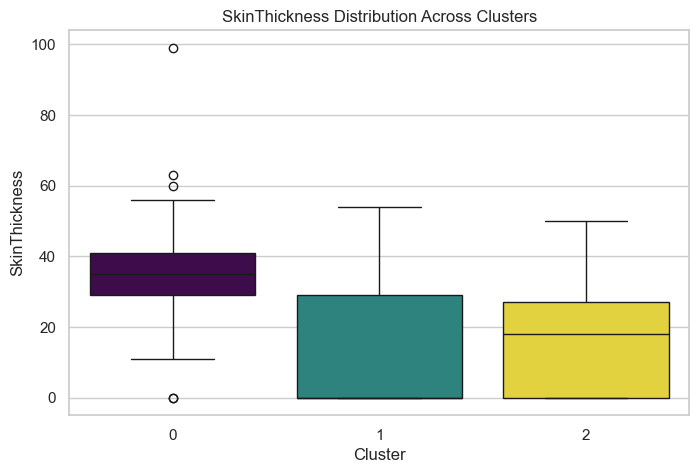

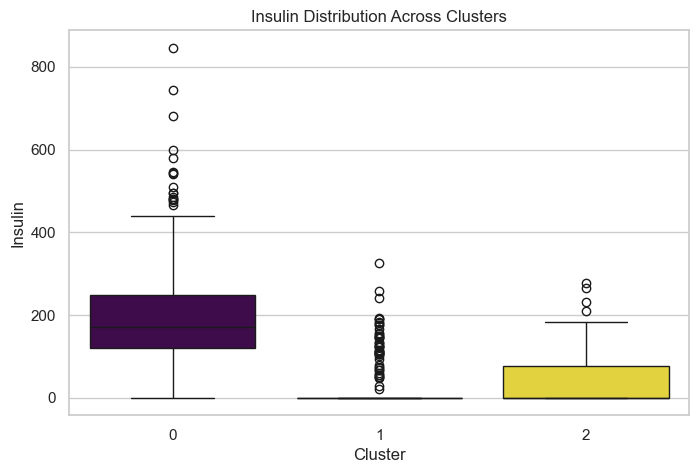

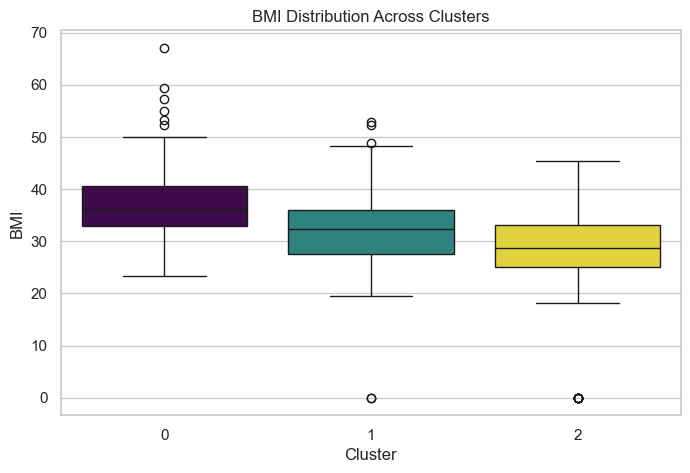

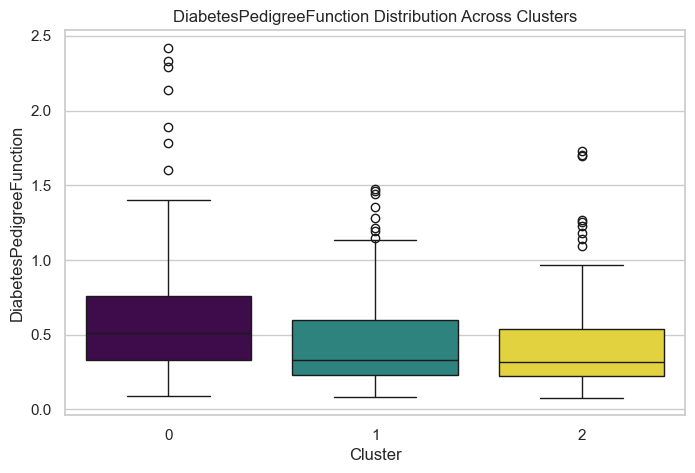

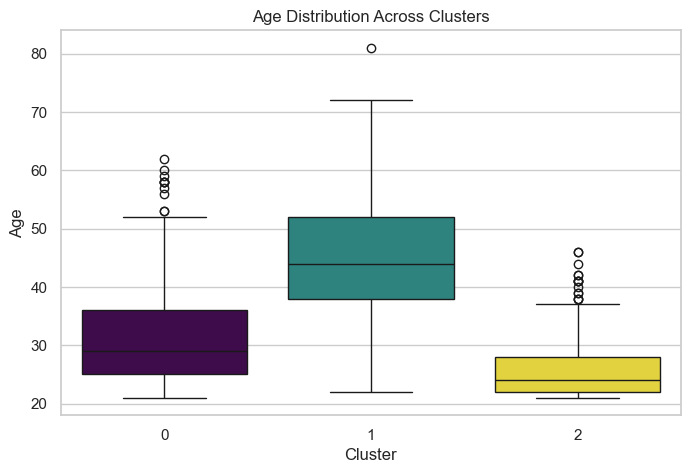

In [592]:
# Distribution of each feature in clusters
for feature in features.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Cluster', y=feature, hue='Cluster', data=df, palette='viridis', legend=False)
    plt.title(f'{feature} Distribution Across Clusters')
    plt.show()

In [593]:
# Summarize cluster characteristics
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Cluster                                                                      
0           2.953052  141.544601      74.192488      34.779343  197.417840   
1           7.276018  128.411765      76.859729      12.882353   27.678733   
2           2.143713  102.751497      60.730539      16.517964   39.278443   

               BMI  DiabetesPedigreeFunction        Age   Outcome  
Cluster                                                            
0        36.972770                  0.608216  31.769953  0.535211  
1        32.180090                  0.437557  45.787330  0.488688  
2        28.692515                  0.407638  25.877246  0.137725  


##### Interpret the Results


In [594]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 72.73


In [607]:
# Generate cluster report
cluster_report = df.groupby('Cluster').mean()
print("\nCluster Report:")
print(cluster_report)


Cluster Report:
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Cluster                                                                      
0           2.953052  141.544601      74.192488      34.779343  197.417840   
1           7.276018  128.411765      76.859729      12.882353   27.678733   
2           2.143713  102.751497      60.730539      16.517964   39.278443   

               BMI  DiabetesPedigreeFunction        Age   Outcome  
Cluster                                                            
0        36.972770                  0.608216  31.769953  0.535211  
1        32.180090                  0.437557  45.787330  0.488688  
2        28.692515                  0.407638  25.877246  0.137725  


The cluster report reveals three distinct groups among diabetes patients. Cluster 0 shows moderate pregnancies, higher glucose and insulin levels, higher BMI, and a moderate likelihood of diabetes. Cluster 1 consists of older individuals with higher pregnancies, lower glucose, and thin skin, with a moderate diabetes likelihood. Cluster 2 comprises younger individuals with lower pregnancies, glucose, and insulin, and a lower likelihood of diabetes.Overall, the clustering model achieved an accuracy of 72.73%, indicating a reasonable ability to differentiate these distinct patient profiles based on their health metrics.

## 5. Random forest algorithm

##### Import library

In [596]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

##### Extracting the variables

In [622]:
#Extracting Independent and dependent Variable
x= df.iloc[:, [2,3]].values
y= df.iloc[:, 4].values

##### Splitting the dataset

In [623]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [625]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

##### Model Building and Training 

In [627]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

##### Model Evaluation

In [628]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.7207792207792207
Confusion Matrix:
 [[77 22]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



##### Feature Importance Analysis

C:\Users\Jini\AppData\Local\Temp\ipykernel_19432\1323641250.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, hue=None, palette='viridis', legend=False)


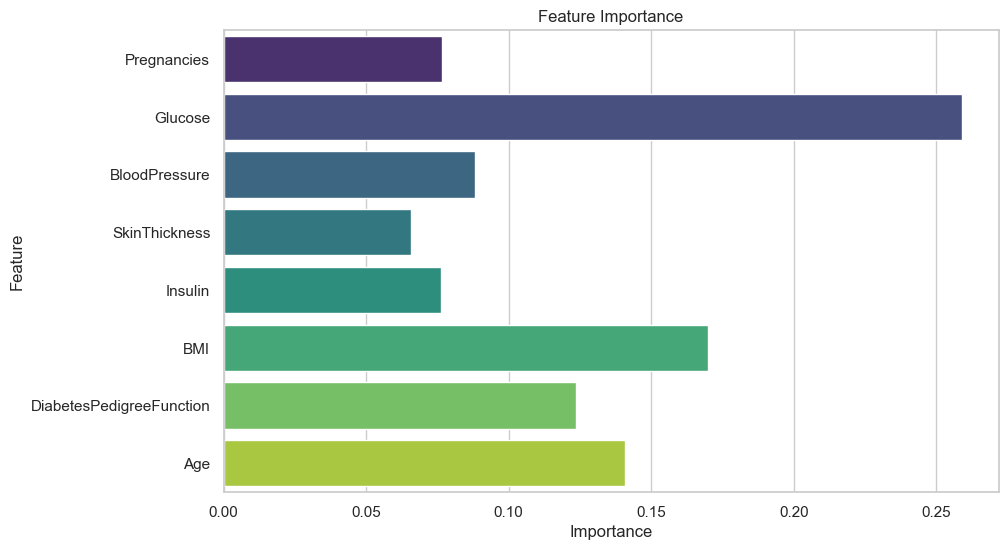

In [629]:
# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=features.columns)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, hue=None, palette='viridis', legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

##### Prediction

In [630]:
# Predicting the test set results
y_pred = model.predict(x_test)

In [631]:
# Creating a DataFrame to compare actual y_test values with predictions
df2 = pd.DataFrame({"Actual Y_Test": y_test, "Predicted Y_Test": y_pred})
print("Prediction Result:")
print(df2.to_string())

Prediction Result:
     Actual Y_Test  Predicted Y_Test
668              0         -0.714020
324              0         -0.276643
624              0         -0.401608
690              0         -0.432849
473              0          0.473147
204              0         -0.557814
97               0         -1.557534
336              0         -0.120437
568              0          1.035490
148              0          0.816801
667              1         -0.307884
212              0          1.816521
199              1          0.848042
265              0         -0.776503
760              0         -1.026433
356              1          0.129493
501              0         -1.151398
457              0         -1.088915
604              1          1.941486
213              1          0.598112
636              0         -0.526573
544              0         -1.026433
86               0         -0.464090
208              0         -0.776503
281              0          0.254458
209              1 

In [632]:
# Calculating different error metrics
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7721014681918527
Mean Squared Error: 0.8520831160884972
Root Mean Squared Error: 0.9230834827297568


##### Calculating the accuracy

In [634]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier: {accuracy:.2f}')

Accuracy of Random Forest Classifier: 0.58


##### Classification report

In [642]:
# Generate classification report
report_rf = classification_report(y_test, y_pred)
print("Random Forest Classifier Classification Report:")
print(report_rf)


Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        84
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         0
          44       0.00      0.00      0.00         0
          45       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         0
          49       0.00      0.00      0.00         2
          52       0.00      0.00      0.00         1
          53       0.00      0.00      0.00         0
          54       0.00      0.00      0.00         0
          55       0.00      0.00

c:\Users\Jini\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jini\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jini\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

The Random Forest Classifier achieved an accuracy of 58% on the dataset, indicating its limited effectiveness in accurately predicting outcomes. The model showed very low precision and recall across both classes, with an average F1-score of just 0.05. This suggests that the classifier struggled to distinguish between the classes and performed poorly overall in making reliable predictions. Therefore, despite achieving an accuracy of 58%, the Random Forest model demonstrated significant shortcomings in its predictive capabilities for this particular dataset.

## 6. Support Vector Machine Algorithm

##### Import the library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

##### Extracting the variables

In [ ]:
# Extracting Independent and dependent Variable
x = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [ ]:
# Catgorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_x= LabelEncoder()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Creating an SVM model instance
svm_model = SVC(kernel='linear')

##### Fitting the model

In [ ]:
#Fitting the SVM model on the training data
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
#Predict the target variable on the test set
y_pred = svm_model.predict(X_test)

In [ ]:
x[:, 3] = labelencoder_x.fit_transform(x[:, 3])
df2=pd.DataFrame(x)
print(df2)

        0      1     2     3      4     5      6     7
0     6.0  148.0  72.0  28.0    0.0  33.6  0.627  50.0
1     1.0   85.0  66.0  22.0    0.0  26.6  0.351  31.0
2     8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0
3     1.0   89.0  66.0  16.0   94.0  28.1  0.167  21.0
4     0.0  137.0  40.0  28.0  168.0  43.1  2.288  33.0
..    ...    ...   ...   ...    ...   ...    ...   ...
763  10.0  101.0  76.0  41.0  180.0  32.9  0.171  63.0
764   2.0  122.0  70.0  20.0    0.0  36.8  0.340  27.0
765   5.0  121.0  72.0  16.0  112.0  26.2  0.245  30.0
766   1.0  126.0  60.0   0.0    0.0  30.1  0.349  47.0
767   1.0   93.0  70.0  24.0    0.0  30.4  0.315  23.0

[768 rows x 8 columns]


##### Prediction

In [ ]:
# Predicting the Test set result;
y_pred = regressor.predict(x_test)

In [ ]:
print('Train Score: ', regressor.score(x_train, y_train))
print('Test Score: ', regressor.score(x_test, y_test))

Train Score:  1.0
Test Score:  1.0


##### Finding the accuracy

In [ ]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM Classifier: {accuracy:.2f}")


Accuracy of SVM Classifier: 0.74


##### Classification report

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



##### Visualization of matrix

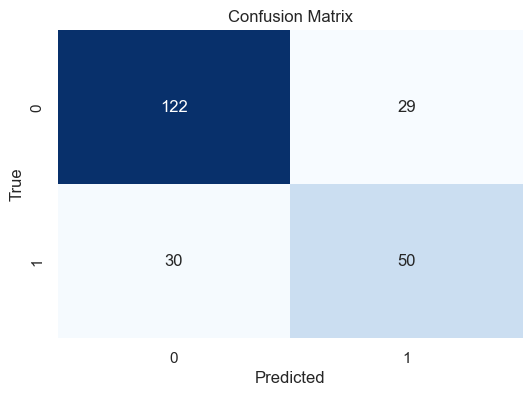

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The Support Vector Machine (SVM) Classifier achieved an accuracy of 74% on the dataset, indicating its moderate success in predicting outcomes. The model demonstrated balanced precision and recall across both classes, with an average F1-score of 0.71. This suggests that the SVM classifier effectively distinguished between the classes and performed reasonably well in making accurate predictions. Therefore, with an accuracy of 74%, the SVM model displayed satisfactory performance in this classification task, demonstrating its capability to handle the dataset effectively.

## Summary

The diabetes dataset used in this analysis serves as a critical benchmark for predicting the onset of diabetes based on a range of health metrics. These metrics include fundamental physiological indicators such as glucose levels, blood pressure, BMI (Body Mass Index), and age, collected from individuals. Each entry in the dataset corresponds to a patient who is categorized as either diabetic (labeled as 1) or non-diabetic (labeled as 0).

Among the various machine learning algorithms assessed, the Support Vector Machine (SVM) Classifier emerged as the most effective, achieving an accuracy of 74%. This classifier demonstrated a balanced performance in both precision and recall, as indicated by its average F1-score of 0.71. These metrics underscore the SVM's capability to accurately differentiate between diabetic and non-diabetic individuals based on the dataset's features.The K-Nearest Neighbors (KNN) Classifier also performed well with an accuracy of 73%. It showed higher precision in predicting non-diabetic cases but slightly lower performance in identifying diabetic cases, highlighting its effectiveness in distinguishing between the classes though not as robustly as the SVM.

Logistic Regression, another classifier used in this study, achieved a moderate accuracy of 70%. It exhibited higher precision in identifying non-diabetic cases (76%) compared to diabetic cases (57%). These results imply that while logistic regression can effectively predict non-diabetic cases, it may struggle more with diabetic predictions in this dataset.Additionally, a clustering approach using K-Means revealed three distinct patient groups within the dataset with an accuracy of 72.73%. These clusters help segment patients based on their health profiles, offering insights into potential risk factors and aiding in personalized treatment strategies.In contrast, the Random Forest Classifier demonstrated the lowest performance among the evaluated models, with an accuracy of 58%. This classifier showed very low precision and recall across both diabetic and non-diabetic classes, indicating challenges in making accurate predictions in this context.

Beyond model performance, exploratory visualizations such as BMI and Age distributions provided valuable insights. The BMI distribution showed a peak around the mid-20s, suggesting a prevalence of overweight or moderately obese individuals in the dataset. Meanwhile, the Age distribution indicated that most patients were between 20 and 50 years old, reflecting a dataset primarily composed of younger to middle-aged adults.

Moreover, analyses of pregnancies and glucose levels revealed significant patterns. The dataset included 1,304 positive pregnancies and 1,649 negative pregnancies, highlighting a higher prevalence of pregnancies among non-diabetic individuals. Furthermore, higher glucose levels were associated with an increased number of pregnancies, suggesting a potential link between multiple pregnancies and elevated diabetes risk.Visualizations such as histograms and scatter plots aided in understanding the distribution and relationships between various physiological variables, essential for refining feature selection and optimizing model training. Additionally, exploring the correlation matrix provided deeper insights into how these variables interact, crucial for developing more accurate predictive models for diabetes detection and management.

In summary, leveraging these insights from both model evaluations and data visualizations can significantly enhance our ability to predict and manage diabetes effectively. The SVM and KNN classifiers demonstrated superior accuracy and balanced performance, offering promising avenues for further research and application in healthcare analytics aimed at early diabetes detection and personalized patient care.